In [2]:
import tensorflow as tf
import sklearn.datasets
import numpy as np

Loading dataset

In [3]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [4]:
x=breast_cancer['data']
y=breast_cancer['target']

In [5]:
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [6]:
print(x.shape,y.shape)

(569, 30) (569,)


In [7]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
import pandas as pd

In [9]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [10]:
data['class']=breast_cancer.target

In [11]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [14]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
print(data.shape)

(569, 31)


Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=data.drop('class',axis=1)
y=data['class']

In [18]:
type(x)

pandas.core.frame.DataFrame

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=1)

In [20]:
print(y.shape,y_train.shape,y_test.shape)

(569,) (426,) (143,)


In [21]:
type(y_train)

pandas.core.series.Series

In [22]:
x_test.T

,432,138,311,237,3,332,560,185,460,523,527,260,402,135,517,493,349,29,458,27,295,166,197,219,95,410,343,258,283,256,301,371,209,321,192,484,403,457,346,28,...,164,157,463,1,249,270,103,65,355,145,23,112,179,416,277,288,221,494,381,280,326,519,186,111,431,70,413,299,7,130,87,384,117,178,339,124,154,272,121,376
mean radius,20.180000,14.950000,14.610000,20.480000,11.420000,11.220000,14.050000,10.080000,17.080000,13.710000,12.340000,20.310000,12.960000,12.770000,19.890000,12.460000,11.950000,17.570000,13.000000,18.610000,13.770000,10.800000,18.080000,19.530000,20.260000,11.360000,19.680000,15.660000,16.240000,19.550000,12.460000,15.190000,15.270000,20.160000,9.720000,15.730000,12.940000,13.210000,12.060000,15.300000,...,23.27000,16.840000,11.600000,20.570000,11.520000,14.290000,9.876000,14.780000,12.560000,11.900000,21.160000,14.260000,12.810000,9.405000,18.810000,11.260000,13.560000,13.160000,11.040000,19.160000,14.110000,12.750000,18.310000,12.630000,12.400000,18.940000,14.990000,10.510000,13.710000,12.190000,19.020000,13.280000,14.870000,13.010000,23.510000,13.370000,13.150000,21.750000,18.660000,10.570000
mean texture,19.540000,17.570000,15.690000,21.460000,20.380000,19.860000,27.150000,15.110000,27.150000,18.680000,12.270000,27.060000,18.290000,22.470000,20.260000,12.830000,14.960000,15.050000,25.130000,20.250000,13.270000,9.710000,21.840000,32.470000,23.030000,17.570000,21.680000,23.200000,18.770000,28.770000,19.890000,13.210000,12.910000,19.660000,18.220000,11.280000,16.170000,25.250000,18.900000,25.270000,...,22.04000,19.460000,18.360000,17.770000,14.930000,16.820000,19.400000,23.940000,19.070000,14.650000,23.040000,19.650000,13.060000,21.700000,19.980000,19.960000,13.900000,20.540000,14.930000,26.600000,12.880000,16.700000,18.580000,20.760000,17.680000,21.310000,22.110000,23.090000,20.830000,13.290000,24.590000,13.720000,16.670000,22.220000,24.270000,16.390000,15.340000,20.990000,17.120000,20.220000
mean perimeter,133.800000,96.850000,92.680000,132.500000,77.580000,71.940000,91.380000,63.760000,111.200000,88.730000,78.940000,132.900000,84.180000,81.720000,130.500000,78.830000,77.230000,115.000000,82.610000,122.100000,88.060000,68.770000,117.400000,128.000000,132.400000,72.490000,129.900000,110.200000,108.800000,133.600000,80.430000,97.650000,98.170000,131.100000,60.730000,102.800000,83.180000,84.100000,76.660000,102.400000,...,152.10000,108.400000,73.880000,132.900000,73.870000,90.300000,63.950000,97.400000,81.920000,78.110000,137.200000,97.830000,81.290000,59.600000,120.900000,73.720000,88.590000,84.060000,70.670000,126.200000,90.030000,82.510000,118.600000,82.150000,81.470000,123.600000,97.530000,66.850000,90.200000,79.080000,122.000000,85.790000,98.640000,82.010000,155.100000,86.100000,85.310000,147.300000,121.400000,70.150000
mean area,1250.000000,678.100000,664.900000,1306.000000,386.100000,387.300000,600.400000,317.500000,930.900000,571.000000,468.500000,1288.000000,525.200000,506.300000,1214.000000,477.300000,426.700000,955.100000,520.200000,1094.000000,582.700000,357.600000,1024.000000,1223.000000,1264.000000,399.800000,1194.000000,773.500000,805.100000,1207.000000,471.300000,711.800000,725.500000,1274.000000,288.100000,747.200000,507.600000,537.900000,445.300000,732.400000,...,1686.00000,880.200000,412.700000,1326.000000,406.300000,632.600000,298.300000,668.300000,485.800000,432.800000,1404.000000,629.900000,508.800000,271.200000,1102.000000,394.100000,561.300000,538.700000,372.700000,1138.000000,616.500000,493.800000,1041.000000,480.400000,467.800000,1130.000000,693.700000,334.200000,577.900000,455.800000,1076.000000,541.800000,682.500000,526.400000,1747.000000,553.500000,538.900000,1491.000000,1077.000000,338.300000
mean smoothness,0.113300,0.116700,0.076180,0.083550,0.142500,0.105400,0.099290,0.092670,0.098980,0.099160,0.090030,0.100000,0.073510,0.090550,0.103700,0.073720,0.115800,0.098470,0.083690,0.094400,0.091980,0.095940,0.073710,0.084200,0.090780,0.088580,0.097970,0.110900,0.106600,0.092600,0.084510,0.079

Binarisation of input

In [23]:
import matplotlib.pyplot as plt

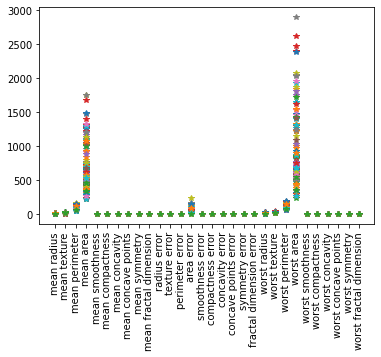

In [24]:
plt.plot(x_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
x_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,0.4331,1.0010,3.008,52.49,0.009087,0.027150,0.055460,0.019100,0.02451,0.004005,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
138,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.4520,8.419,101.90,0.010000,0.034800,0.065770,0.028010,0.05168,0.002887,18.55,21.43,121.40,971.4,0.1411,0.21640,0.33550,0.16670,0.3414,0.07147
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695
237,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,0.6874,1.0410,5.144,83.50,0.007959,0.031330,0.042570,0.016710,0.01341,0.003933,24.22,26.17,161.70,1750.0,0.1228,0.23110,0.31580,0.14450,0.2238,0.07127
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300


In [26]:
x_binarized_3_train=x_train['mean area'].map(lambda x:0 if x<1000 else 1)

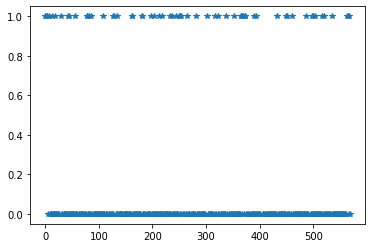

In [27]:
plt.plot(x_binarized_3_train,'*')

In [28]:
x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[1,0])

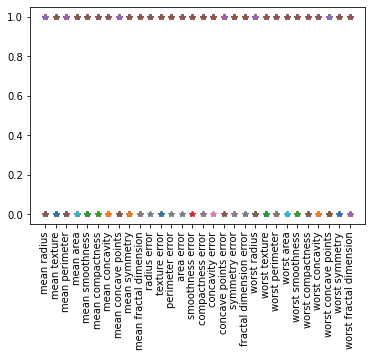

In [29]:
plt.plot(x_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [30]:
x_binarised_test=x_test.apply(pd.cut,bins=2,labels=[1,0])

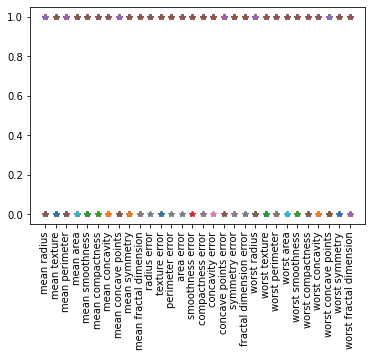

In [31]:
plt.plot(x_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [32]:
type(x_binarised_test)

pandas.core.frame.DataFrame

In [33]:
x_binarised_train=x_binarised_train.values
x_binarised_test=x_binarised_test.values

In [34]:
type(x_binarised_train)

numpy.ndarray

MP neuron model

In [35]:
from random import randint

In [36]:
x_binarised_train.shape

(426, 30)

In [45]:
b=3
i=randint(0,x_binarised_train.shape[0])
print(i)

162


In [46]:
y_train[162]

0

In [47]:
if(np.sum(x_binarised_train[i,:])>=b):
  print('MP neuron inference is malignant')
else:
  print('MP neuron inference is benign')

if(y_train[i]==1):
  print('Ground Truth is malignant')
else:
  print('Ground Truth is benign')  

MP neuron inference is malignant
Ground Truth is benign


In [53]:
b=3
y_pred_train=[]
accurate_rows=0

for x,y in zip(x_binarised_train,y_train):
  y_pred=(np.sum(x)>=b)
  y_pred_train.append(y_pred)
  accurate_rows+=(y==y_pred)

print('{} {:.2f}'.format(accurate_rows,accurate_rows/x_binarised_train.shape[0]))

267 0.63


In [54]:
from sklearn.metrics import accuracy_score

In [57]:
for b in range(x_binarised_train.shape[1]+1):
  y_pred_train=[]
  accurate_rows=0

  for x,y in zip(x_binarised_train,y_train):
    y_pred=(np.sum(x)>=b)
    y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)

  print('{} {:.4f}'.format(b,accurate_rows/x_binarised_train.shape[0]))  
  

0 0.6268
1 0.6268
2 0.6268
3 0.6268
4 0.6268
5 0.6268
6 0.6268
7 0.6268
8 0.6268
9 0.6268
10 0.6268
11 0.6268
12 0.6268
13 0.6291
14 0.6338
15 0.6385
16 0.6455
17 0.6549
18 0.6596
19 0.6690
20 0.6784
21 0.6972
22 0.7136
23 0.7347
24 0.7676
25 0.8005
26 0.8263
27 0.8404
28 0.8521
29 0.8169
30 0.7582


In [70]:
b=28
y_pred_test=[]

for x in x_binarised_test:
   y_pred=(np.sum(x)>=b)
   y_pred_test.append(y_pred)

accuracy=accuracy_score(y_pred_test,y_test)
print(b,accuracy)

28 0.8531468531468531


MP Neuron Class

In [80]:
class MPNeuron:
  def __init__(self):
    self.b=None

  def model(self,x):
    return (sum(x)>=self.b)

  def predict(self,x):
    y=[]
    for x in x:
      result=self.model(x)
      y.append(result)
    return np.array(y)

  def fit(self,x,y):
    accuracy={}

    for b in range(x.shape[1]+1):
      self.b=b
      y_pred=self.predict(x)
      accuracy[b]=accuracy_score(y_pred,y)

    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b

    print('Optimal value of b is',best_b)        
    print('Highest accuracy is',accuracy[best_b])

In [81]:
mp_neuron=MPNeuron()
mp_neuron.fit(x_binarised_train,y_train)

Optimal value of b is 28
Highest accuracy is 0.852112676056338


In [119]:
#Example to the key of the corresponding max value
accuracy={'k1':100,'k2':50}
max(accuracy,key=accuracy.get) #Returns the corresponding key value

'k1'

In [82]:
y_test_pred=mp_neuron.predict(x_binarised_test)
accuracy_test=accuracy_score(y_test_pred,y_test)

In [83]:
print(accuracy_test)

0.8531468531468531


Perceptron Class

In [85]:
x_train=x_train.values
x_test=x_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [114]:
class Perceptron:
  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0 

  def predict(self,X):
    y=[]
    for x in X:
      result=self.model(x)
      y.append(result)
    return np.array(y)

  def fit(self,X,Y,epochs=1,lr=1):
    self.w=np.ones(X.shape[1])   #(30,)
    self.b=0

    accuracy={}
    max_accuracy=0

    wt_matrix=[]

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b-lr*1
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b+lr*1

      wt_matrix.append(self.w)

      accuracy[i]=accuracy_score(self.predict(X),Y) 
      if accuracy[i]>max_accuracy:
        max_accuracy=accuracy[i]
        chkptw=self.w
        chkptb=self.b

    self.w=chkptw
    self.b=chkptb 

    print(max_accuracy)  

    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()

    return np.array(wt_matrix)

In [115]:
perceptron=Perceptron()

0.9530516431924883


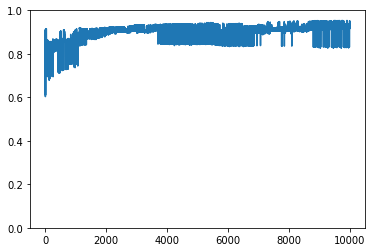

In [116]:
wt_matrix=perceptron.fit(x_train,y_train,10000,0.5)

In [122]:
y_pred_test=perceptron.predict(x_test)
print(accuracy_score(y_pred_test,y_test))

0.9440559440559441


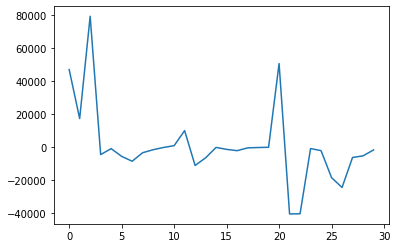

In [134]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [127]:
%matplotlib inline
from matplotlib import animation,rc
from IPython.display import HTML

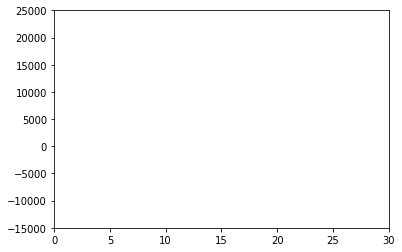

In [135]:
# First set up the figure, the axis, and the plot element we want to animate
fig,ax=plt.subplots()

ax.set_xlim((0,wt_matrix.shape[1]))
ax.set_ylim((-15000,25000))

line,=ax.plot([],[],lw=2)

In [131]:
# animation function. This is called sequentially
def animate(i):
  x=list(range(wt_matrix.shape[1]))
  y=wt_matrix[i,:]
  line.set_data(x,y)
  return (line,)

In [136]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig,animate,frames=100,interval=200,blit=True)

In [137]:
HTML(anim.to_html5_video())